In [8]:
import numpy as np 
import pandas as pd
import os

print(os.listdir("cell_images"))

['Parasitized', 'Uninfected']


# 基于深度学习的疟疾检测算法


In [10]:
parasitized_data = os.listdir('cell_images/Parasitized/')
print(parasitized_data[:10]) 
#我们得到的输出是.png图片文件

uninfected_data = os.listdir('cell_images/Uninfected/')
print('\n')
print(uninfected_data[:10])

['C100P61ThinF_IMG_20150918_144104_cell_162.png', 'C100P61ThinF_IMG_20150918_144104_cell_163.png', 'C100P61ThinF_IMG_20150918_144104_cell_164.png', 'C100P61ThinF_IMG_20150918_144104_cell_165.png', 'C100P61ThinF_IMG_20150918_144104_cell_166.png', 'C100P61ThinF_IMG_20150918_144104_cell_167.png', 'C100P61ThinF_IMG_20150918_144104_cell_168.png', 'C100P61ThinF_IMG_20150918_144104_cell_169.png', 'C100P61ThinF_IMG_20150918_144104_cell_170.png', 'C100P61ThinF_IMG_20150918_144104_cell_171.png']


['C100P61ThinF_IMG_20150918_144104_cell_128.png', 'C100P61ThinF_IMG_20150918_144104_cell_131.png', 'C100P61ThinF_IMG_20150918_144104_cell_144.png', 'C100P61ThinF_IMG_20150918_144104_cell_21.png', 'C100P61ThinF_IMG_20150918_144104_cell_25.png', 'C100P61ThinF_IMG_20150918_144104_cell_34.png', 'C100P61ThinF_IMG_20150918_144104_cell_48.png', 'C100P61ThinF_IMG_20150918_144104_cell_65.png', 'C100P61ThinF_IMG_20150918_144348_cell_108.png', 'C100P61ThinF_IMG_20150918_144348_cell_120.png']


## 数据可视化

1、Parasitized

In [11]:
import cv2

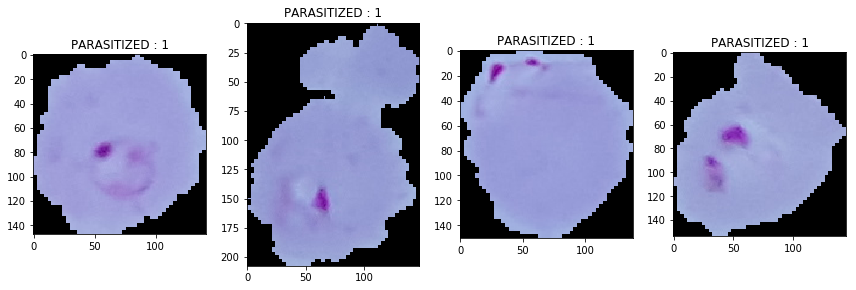

In [12]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('cell_images/Parasitized' + "/" + parasitized_data[i])
    plt.imshow(img)
    plt.title('Parasitized : 1')
    plt.tight_layout()
plt.show()

Uninfected

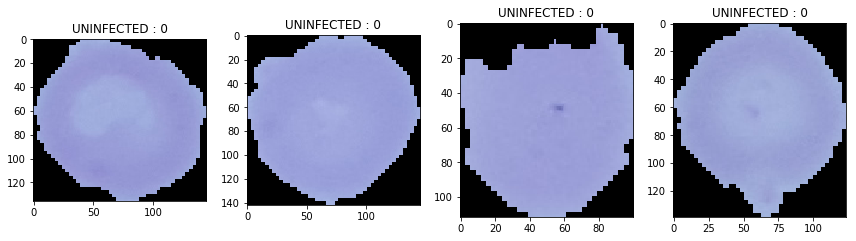

In [14]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('cell_images/Uninfected' + "/" + uninfected_data[i+1])
    plt.imshow(img)
    plt.title('Uninfected : 0')
    plt.tight_layout()
plt.show()

**结论**：人们可以清楚地看到感染和未感染之间的区别。 你可以在细胞图像中观察到一个小的凝块被感染，而未感染的细胞图像是干净的，没有任何凝块。

In [15]:
data = []
labels = []
for img in parasitized_data:
    try:
        img_read = plt.imread('cell_images/Parasitized/' + "/" + img)#读取图片文件
        img_resize = cv2.resize(img_read, (50, 50))#将图像进行缩放为（50，50）的格式
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in uninfected_data:
    try:
        img_read = plt.imread('cell_images/Uninfected' + "/" + img)
        img_resize = cv2.resize(img_read, (50, 50))
        img_array = img_to_array(img_resize)
        data.append(img_array)
        labels.append(0)
    except:
        None

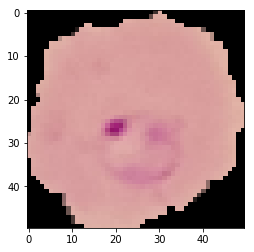

In [16]:
plt.imshow(data[0])
plt.show()

In [17]:
image_data = np.array(data)#矩阵化图片
labels = np.array(labels)#标签

In [18]:
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)#随机打乱顺序函数
image_data = image_data[idx]
labels = labels[idx]

In [40]:
labels

array([1, 0, 1, ..., 1, 1, 0])

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 101)

In [20]:
y_train = np_utils.to_categorical(y_train, num_classes = 2)
y_test = np_utils.to_categorical(y_test, num_classes = 2)

In [21]:
print(f'SHAPE OF TRAINING IMAGE DATA : {x_train.shape}')
print(f'SHAPE OF TESTING IMAGE DATA : {x_test.shape}')
print(f'SHAPE OF TRAINING LABELS : {y_train.shape}')
print(f'SHAPE OF TESTING LABELS : {y_test.shape}')

SHAPE OF TRAINING IMAGE DATA : (22046, 50, 50, 3)
SHAPE OF TESTING IMAGE DATA : (5512, 50, 50, 3)
SHAPE OF TRAINING LABELS : (22046, 2)
SHAPE OF TESTING LABELS : (5512, 2)


### 构建CNN模型（无数据增强）

In [22]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [23]:
def CNNbuild(height, width, classes, channels):
    model = Sequential()#顺序模型
    
    inputShape = (height, width, channels)
    chanDim = -1
    
    if K.image_data_format() == 'channels_first':
        inputShape = (channels, height, width)
    model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
    model.add(MaxPooling2D(2,2))#对于空间数据进行最大池化。
    #在每一个批次的数据中标准化前一层的激活项，应用一个维持激活项平均值接近0，标准差接近1的转换
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))

    model.add(Conv2D(32, (3,3), activation = 'relu'))
    model.add(MaxPooling2D(2,2))
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.2))
    model.add(Flatten())
    
    model.add(Dense(512, activation = 'relu'))#全连接层
    model.add(BatchNormalization(axis = chanDim))
    model.add(Dropout(0.5))
    model.add(Dense(classes, activation = 'softmax'))
    
    return model

In [24]:
#实例化模型
height = 50
width = 50
classes = 2
channels = 3
model = CNNbuild(height = height, width = width, classes = classes, channels = channels)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 11, 11, 32)        128       
__________

In [25]:
#编译模型
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [26]:
#将模型拟合到数据集上
h = model.fit(x_train, y_train, epochs = 20, batch_size = 32)

Epoch 1/20
22046/22046 [==============================] - 193s 9ms/step - loss: 0.5126 - acc: 0.7917
Epoch 2/20
22046/22046 [==============================] - 191s 9ms/step - loss: 0.2206 - acc: 0.9188
Epoch 3/20
22046/22046 [==============================] - 194s 9ms/step - loss: 0.1856 - acc: 0.9362
Epoch 4/20
22046/22046 [==============================] - 194s 9ms/step - loss: 0.1732 - acc: 0.9423
Epoch 5/20
22046/22046 [==============================] - 187s 8ms/step - loss: 0.1637 - acc: 0.9447
Epoch 6/20
22046/22046 [==============================] - 186s 8ms/step - loss: 0.1605 - acc: 0.9472
Epoch 7/20
22046/22046 [==============================] - 186s 8ms/step - loss: 0.1523 - acc: 0.9499
Epoch 8/20
22046/22046 [==============================] - 186s 8ms/step - loss: 0.1511 - acc: 0.9500
Epoch 9/20
22046/22046 [==============================] - 187s 8ms/step - loss: 0.1519 - acc: 0.9502
Epoch 10/20
22046/22046 [==============================] - 188s 9ms/step - loss: 0.1473 - a

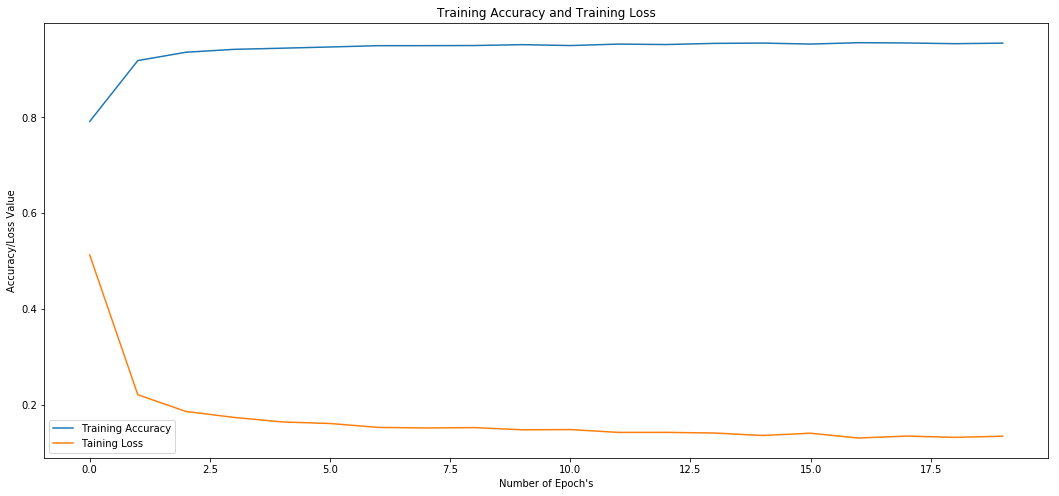

In [27]:
plt.figure(figsize = (18,8))
plt.plot(range(20), h.history['acc'], label = 'Training Accuracy')
plt.plot(range(20), h.history['loss'], label = 'Taining Loss')
plt.xlabel("Number of Epoch's")
plt.ylabel('Accuracy/Loss Value')
plt.title('Training Accuracy and Training Loss')
plt.legend(loc = "best")

In [28]:
#评估测试数据的模型
predictions = model.evaluate(x_test, y_test)

5512/5512 [==============================] - 9s 2ms/step


In [29]:
print(f'LOSS : {predictions[0]}')
print(f'ACCURACY : {predictions[1]}')

LOSS : 0.1559626445125556
ACCURACY : 0.956821480406386


该模型在测试数据上的表现似乎相当不错，准确率为95.68％。

### 数据增加，通过实时数据增强生成张量图像数据批次

In [30]:
from keras.preprocessing.image import ImageDataGenerator

In [31]:
train_datagen = ImageDataGenerator(rescale = 1/255.,
                                  horizontal_flip = True,
                                  width_shift_range = 0.2,
                                  height_shift_range = 0.2,
                                  fill_mode = 'nearest',
                                  zoom_range = 0.3,
                                  rotation_range = 30)
val_datagen = ImageDataGenerator(rescale = 1/255.)

train_generator = train_datagen.flow(x_train, y_train, batch_size = 64, shuffle = False)
val_generator = val_datagen.flow(x_test, y_test, batch_size = 64, shuffle = False)

In [32]:
#调用与上面相同的模型
model_aug = CNNbuild(height = height, width = width, classes = classes, channels = channels)

In [33]:
#编译模型
optim = optimizers.Adam(lr = 0.001, decay = 0.001 / 64)
model_aug.compile(loss = 'categorical_crossentropy', optimizer = optim, metrics = ['accuracy'])

In [34]:
#在扩充数据集上拟合模型
h_aug = model_aug.fit_generator(train_generator, steps_per_epoch = len(x_train) // 64, epochs = 50)

Epoch 1/50
344/344 [==============================] - 100s 291ms/step - loss: 0.8083 - acc: 0.6012
Epoch 2/50
344/344 [==============================] - 100s 291ms/step - loss: 0.5802 - acc: 0.7037
Epoch 3/50
344/344 [==============================] - 102s 297ms/step - loss: 0.3944 - acc: 0.8294
Epoch 4/50
344/344 [==============================] - 100s 290ms/step - loss: 0.3255 - acc: 0.8732
Epoch 5/50
344/344 [==============================] - 101s 294ms/step - loss: 0.3075 - acc: 0.8860
Epoch 6/50
344/344 [==============================] - 97s 281ms/step - loss: 0.2946 - acc: 0.8899
Epoch 7/50
344/344 [==============================] - 97s 283ms/step - loss: 0.2865 - acc: 0.8947
Epoch 8/50
344/344 [==============================] - 97s 281ms/step - loss: 0.2710 - acc: 0.9012
Epoch 9/50
344/344 [==============================] - 97s 283ms/step - loss: 0.2668 - acc: 0.9018
Epoch 10/50
344/344 [==============================] - 97s 281ms/step - loss: 0.2674 - acc: 0.9030
Epoch 11/50
34

In [36]:
#在增强测试数据上评估模型
predict = model_aug.evaluate_generator(val_generator, steps = 5)

In [37]:
print(f'LOSS ON TEST DATA AFTER DATA AUGMENTATION : {predict[0]}')
print(f'ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : {predict[1]}')

LOSS ON TEST DATA AFTER DATA AUGMENTATION : 0.19134154170751572
ACCURACY ON TEST DATA AFTER DATA AUGMENTATION : 0.934375
